
# Introducción a la visión artificial
numpy: tratamiento de matrices y vectores
matplotlib: visualizacion
imageio: leer y guardar imagenes
scikit-image: coversion de color a RGB

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt


In [2]:
from skimage import color

In [3]:
archivo = 'C:/Users/jenif/Documents/gray-wolf.jpg'
imgIn = imageio.imread(archivo)

C:\Users\jenif\AppData\Local\Temp\ipykernel_17772\50353912.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imgIn = imageio.imread(archivo)


In [4]:
#Caracteristicas de la imagen = matriz ancho*altura*3
print('Forma de la imagen:', imgIn.shape)

Forma de la imagen: (640, 960, 3)


In [5]:
print('Pixel en [0,0,:]', imgIn[0,0,:])

Pixel en [0,0,:] [134  88  54]


In [6]:
print('Tipo de dato:', imgIn.dtype)

Tipo de dato: uint8


In [7]:
#Rango de valores contenidos en la matriz (por color)
print('Valor máximo', imgIn.max())
print('Valor minimo', imgIn.min())

Valor máximo 255
Valor minimo 0



# Visualizacion de la imagen

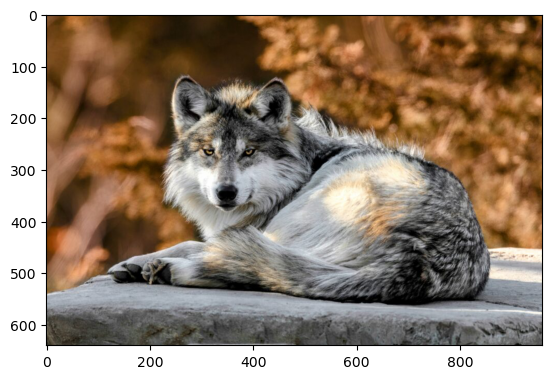

In [8]:
plt.imshow(imgIn)

In [9]:
#Transformacion a escala de grises

In [10]:
imgGray = color.rgb2gray(imgIn)
print('Dimensiones en la escala de grises', imgGray.shape)
print('Tipo de dato contenido:', imgGray.dtype)

Dimensiones en la escala de grises (640, 960)
Tipo de dato contenido: float64


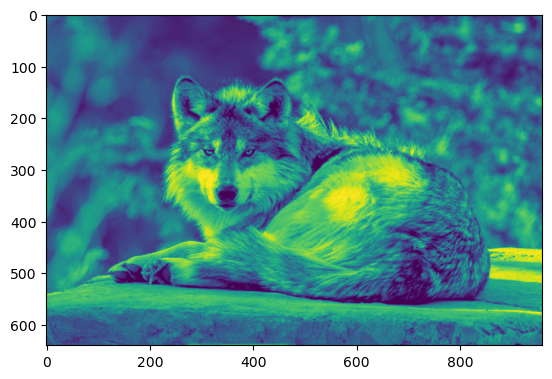

In [11]:
#Imagen en escala de grises?
plt.imshow(imgGray);

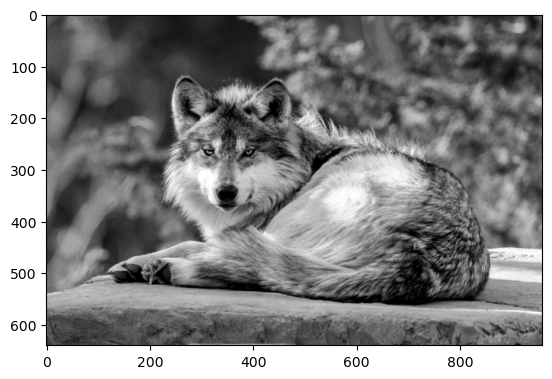

In [12]:
plt.imshow(imgGray, cmap='gray');

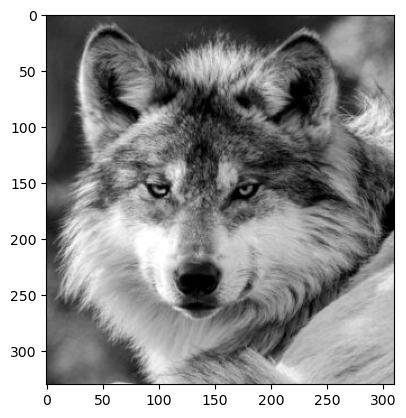

In [13]:
#Sección de image
imgSeccion = imgGray[110:440, 215:525]
plt.imshow(imgSeccion, cmap='gray');

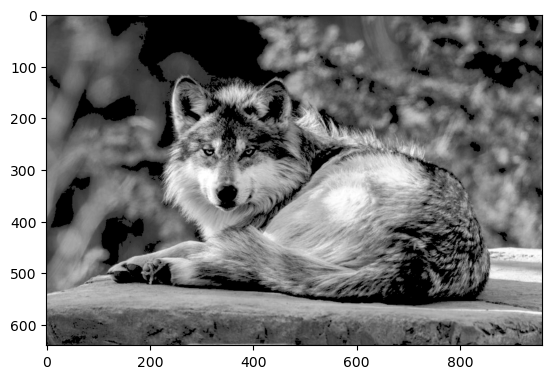

In [14]:
#Cambio de valores en la matriz de color 
imgModificada=imgGray.copy()
imgModificada[imgModificada < 0.2] = 0.0
plt.imshow(imgModificada, cmap='gray');

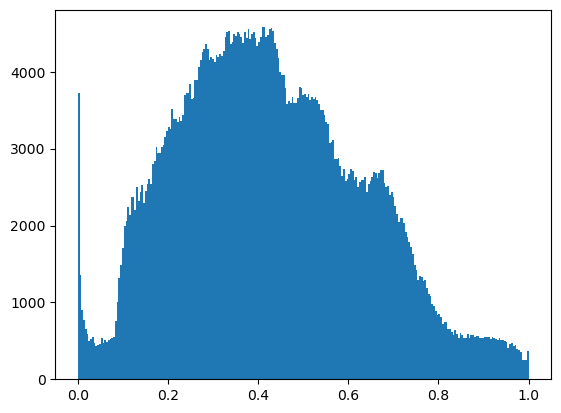

In [15]:
#Distribucion de valores de los píxeles
_ = plt.hist(imgGray.flatten(), bins=np.linspace(0,1,256))

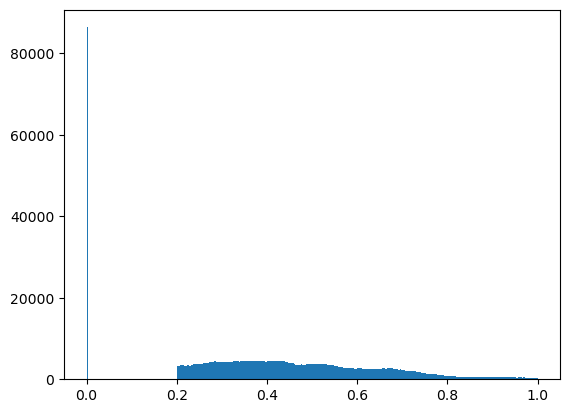

In [16]:
_ = plt.hist(imgModificada.flatten(), bins=np.linspace(0,1,256))

# Escribir imagen

In [17]:
imageio.imwritte('C:/Users/jenif/Documents/gray-wolf.jpg', (255*imgModificada).astype('uint8'))

AttributeError: module 'imageio' has no attribute 'imwritte'

# Introduccion a Open CV

In [20]:
#Biblioteca Open CV
import cv2 
import common
# Para control de dimensiones de la imagen 
import pylab

In [21]:
pylab.rcParams['figure.figsize']= (6.0,4.0)

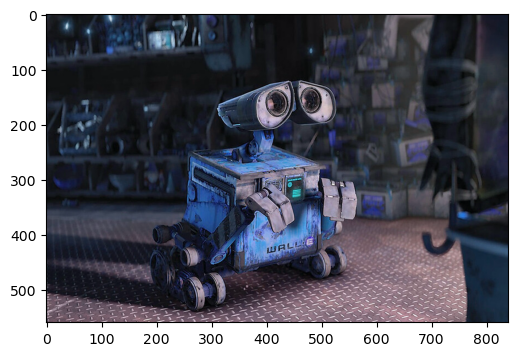

In [42]:
archivo ='C:/Users/jenif/Documents/wall-e.jpg'
input_image= cv2.imread(archivo)
plt.imshow(input_image);

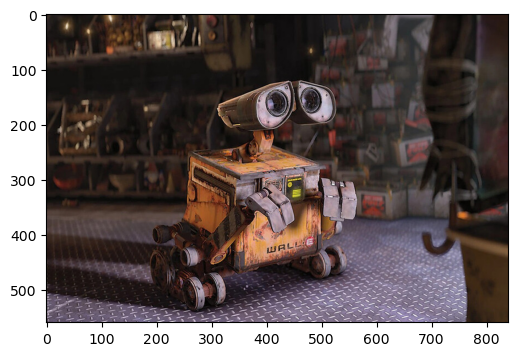

In [23]:
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB));

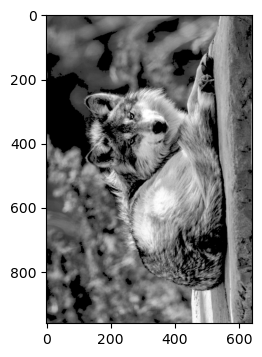

In [24]:
plt.imshow(imgModificada.T, cmap='gray');

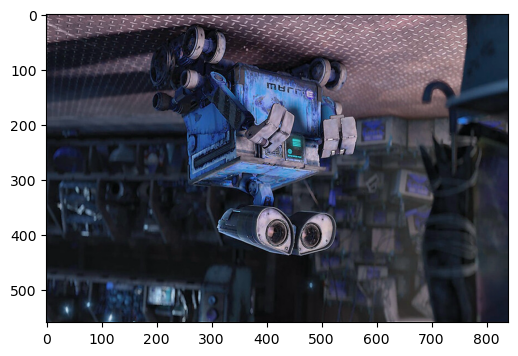

In [25]:
#Inversion vertical de la imagen(0)
flipped_img = cv2.flip(input_image, 0)
plt.imshow(flipped_img);

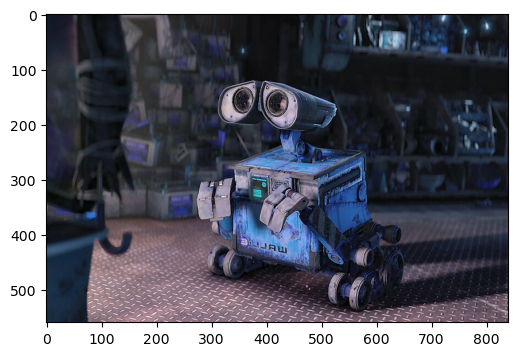

In [26]:
#Inversion horizontal de la imagen (1)
flipped_img_1 = cv2.flip(input_image, 1)
plt.imshow(flipped_img_1);

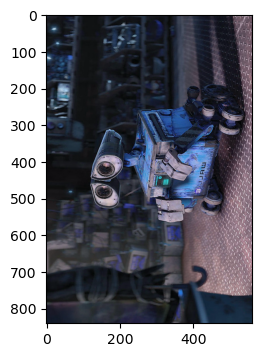

In [27]:
transpuesta = cv2.transpose(input_image)
plt.imshow(transpuesta);

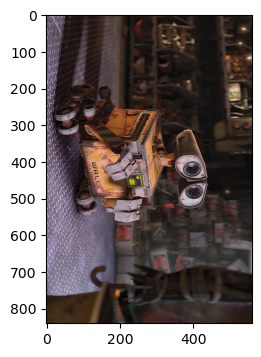

In [28]:
plt.imshow(cv2.cvtColor(cv2.flip(transpuesta,1), cv2.COLOR_BGR2RGB));

In [29]:
for i in range(0,3):
    minimo, maximo, min_loc, max_loc = cv2.minMaxLoc(input_image[:,:,i]);
    print('min {} esta ubicado en {} y el max {} esta ubicado en {}'.format(minimo, min_loc, maximo, max_loc))

min 0.0 esta ubicado en (158, 2) y el max 255.0 esta ubicado en (393, 143)
min 0.0 esta ubicado en (254, 2) y el max 255.0 esta ubicado en (521, 309)
min 0.0 esta ubicado en (275, 48) y el max 255.0 esta ubicado en (396, 141)


# Operaciones aritméticas con Open CV

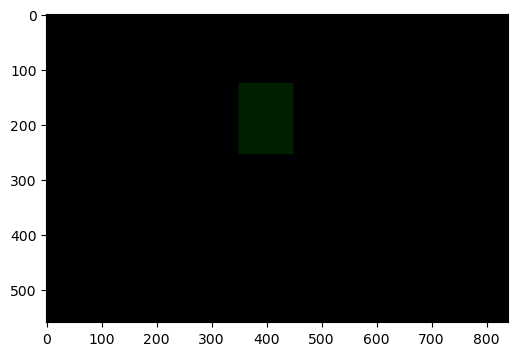

In [30]:
blank_image = np.zeros((input_image.shape),np.uint8)
blank_image[125:255, 350:450,1] = 30
plt.imshow(blank_image);


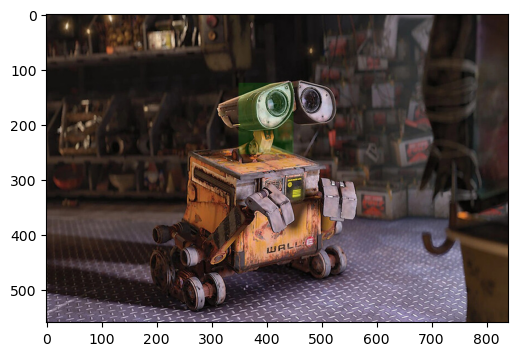

In [31]:
nueva = cv2.cvtColor(cv2.add(blank_image, input_image), cv2.COLOR_BGR2RGB)
plt.imshow(nueva);

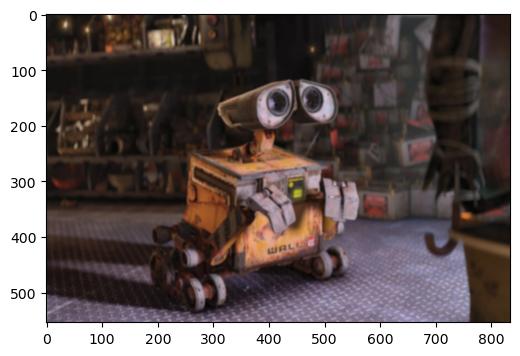

In [32]:
d = 3
img_desenfoque = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1),-1)[d:-3, d:-d]
plt.imshow(cv2.cvtColor(img_desenfoque, cv2.COLOR_BGR2RGB));

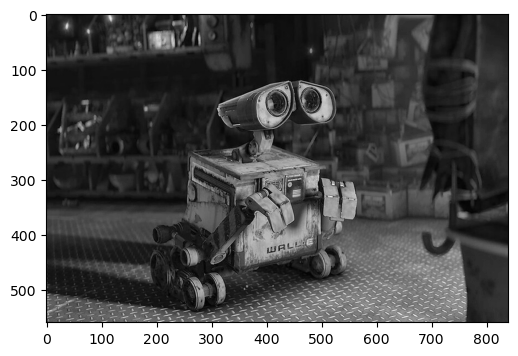

In [33]:
grayImage= cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY);
plt.imshow(grayImage, cmap='gray');

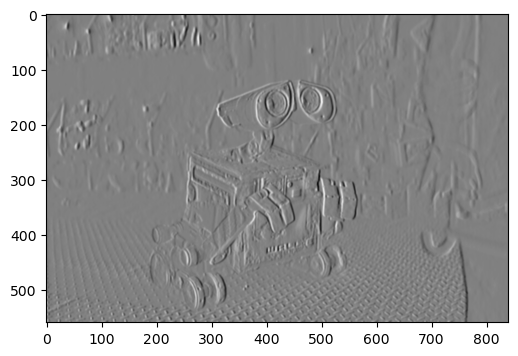

In [36]:
sobelX = cv2.Sobel(grayImage, cv2.CV_64F, 1, 0, ksize=9)
plt.imshow(sobelX, cmap='gray');

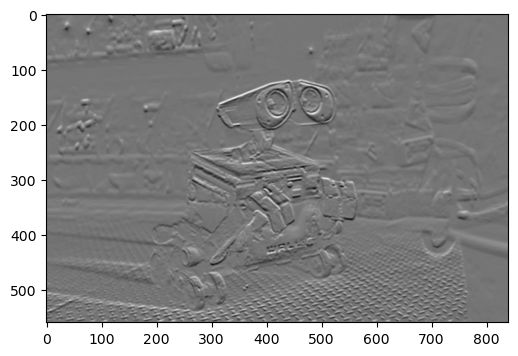

In [38]:
sobelY = cv2.Sobel(grayImage, cv2.CV_64F, 0, 1, ksize=9)
plt.imshow(sobelY, cmap='gray');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


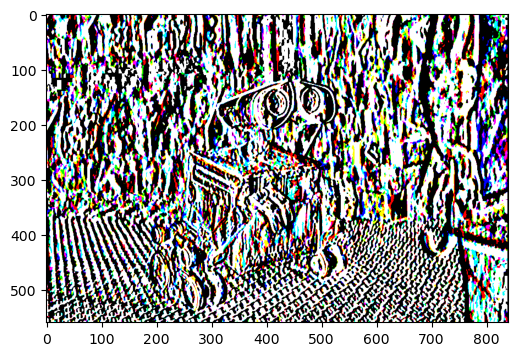

In [45]:
sobelX = cv2.Sobel(input_image, cv2.CV_64F, 1, 0, ksize=9)
plt.imshow(sobelX, cmap='gray');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


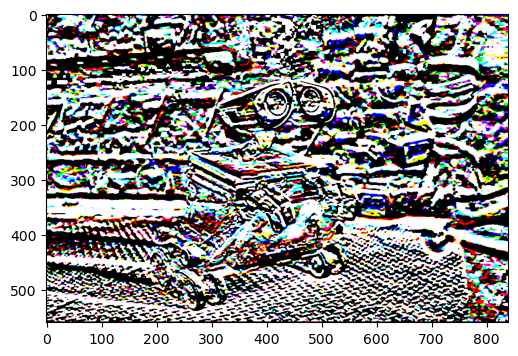

In [46]:
sobelY = cv2.Sobel(input_image, cv2.CV_64F, 0, 1, ksize=9)
plt.imshow(sobelY, cmap='gray');

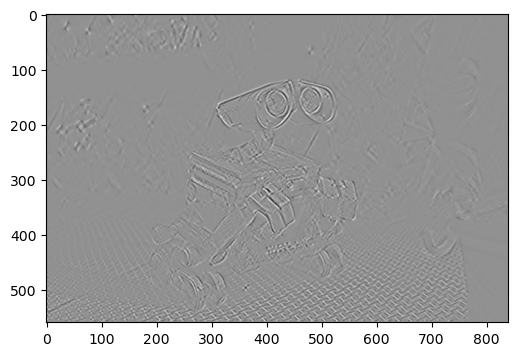

In [50]:
sobelXY = cv2.Sobel(grayImage, cv2.CV_64F, 1, 1, ksize=9)
plt.imshow(sobelXY, cmap='gray');